In [1]:
import cv2
import numpy as np
import PIL
import os
import utils
import matplotlib.pyplot as plt 

In [3]:
def get_obj_img_points(images, grid=(9,6)):
    object_points = []
    img_points = []
    for img in images:
        object_point = np.zeros( (grid[0]*grid[1],3),np.float32 )
        object_point[:,:2]= np.mgrid[0:grid[0],0:grid[1]].T.reshape(-1,2)

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, grid, None)
        if ret:
            object_points.append(object_point)
            img_points.append(corners)

    return object_points, img_points

In [4]:
def cal_undistort(img, objpoints, imgpoints):
    ret, mtx, dist,rvecs, tves = cv2.calibrateCamera(objpoints,imgpoints, img.shape[1::-1], None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

In [5]:
file = 'E:\Code\lane_detect\camera_cal\calibration1.jpg'
file1 = 'E:\Code\lane_detect\test_images\straight_lines1.jpg'
image = cv2.imread(file)
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.imshow('image', image)
cv2.waitKey(0)
cv2.destroyWindow('image')


In [6]:
object_points, img_points = get_obj_img_points(image, grid=(9,6))
dst = cal_undistort(image, object_points, img_points)
cv2.namedWindow('out_image', cv2.WINDOW_NORMAL)
cv2.waitKey(0)
cv2.destroyWindow('out_image')

error: OpenCV(4.1.1) c:\projects\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0xe227985e::Set<1,-1,-1>,struct cv::impl::A0xe227985e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


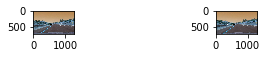

In [10]:
cal_imgs = utils.get_images_by_dir('camera_cal')

#计算object_points,img_points
object_points,img_points = get_obj_img_points(cal_imgs,grid=(9,6))
#获取测试图片
test_imgs = utils.get_images_by_dir('test_images')



#校正测试图片
undistorted = []
i = 0
j = 1
for img in test_imgs:
    img = cal_undistort(img,object_points,img_points)
    undistorted.append(img)
    

plt.figure()
plt.subplot(8,2,1)
plt.imshow(test_imgs[0])
plt.subplot(8,2,2)
plt.imshow(undistorted[0]) 



plt.show()
# for img1, img2 in zip(test_imgs, undistorted):
# 	plt.subplot(8,2,j)
# 	plt.plot(test_imgs[i])
# 	j = j + 1
# 	plt.subplot(8,2,j)
# 	plt.plot(undistorted[i])
# 	j = j + 1
# 	i = i+1
# plt.show()
	


In [ ]:
def get_images_by_dir(dirname):
    img_names = os.listdir(dirname)
    img_paths = [dirname+'/'+img_name for img_name in img_names]
    imgs = [cv2.imread(path) for path in img_paths]
    return imgs
def show_image():
	cv2.imshow()

In [ ]:
img = cv2.imread(file1)
img = img.convert('L')
plt.figure('Image')
plt.imshow(img, cmap='gray')
plt.show()
